In [11]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [12]:
df = pd.read_csv(r'card_transdata.csv')

df.head()

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
0,57.877857,0.311140,1.945940,1.0,1.0,0.0,0.0,0.0
1,10.829943,0.175592,1.294219,1.0,0.0,0.0,0.0,0.0
2,5.091079,0.805153,0.427715,1.0,0.0,0.0,1.0,0.0
3,2.247564,5.600044,0.362663,1.0,1.0,0.0,1.0,0.0
4,44.190936,0.566486,2.222767,1.0,1.0,0.0,1.0,0.0


In [13]:
# Para saber cual es la proporción de la variable target
df.fraud.value_counts(normalize=True).round(2)

0.0    0.91
1.0    0.09
Name: fraud, dtype: float64

In [14]:
# Para saber nulos 
df.describe()

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
count,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000
mean,26.628792,5.036519,1.824182,0.881536,0.350399,0.100608,0.650552,0.087403
std,65.390784,25.843093,2.799589,0.323157,0.477095,0.300809,0.476796,0.282425
min,0.004874,0.000118,0.004399,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.878008,0.296671,0.475673,1.000000,0.000000,0.000000,0.000000,0.000000
50%,9.967760,0.998650,0.997717,1.000000,0.000000,0.000000,1.000000,0.000000
75%,25.743985,3.355748,2.096370,1.000000,1.000000,0.000000,1.000000,0.000000
max,10632.723672,11851.104565,267.802942,1.000000,1.000000,1.000000,1.000000,1.000000


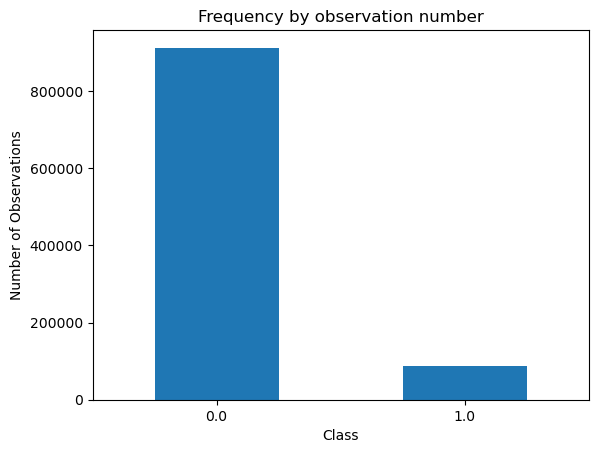

In [15]:
count_classes = pd.value_counts(df['fraud'], sort = True)
count_classes.plot(kind = 'bar', rot=0)
plt.title("Frequency by observation number")
plt.xlabel("Class")
plt.ylabel("Number of Observations");

# Propuestas 

1. Trabajar con dataset total. (1MM de registros, proporción variable target 90-10)
2. Seleccionar menor cantidad de registros y buscando una proporción de la variable target 70-30, para tener el datasets menos desbalanceado. Según cálculos , se debería extraer una muestra de 291343 datos totales. 


A partir de la selección del dataset: 

1. Aplicar los siguientes modelos sobre el conjunto de datos: 

   1.a. KNN. (Carlos)

   1.b. Naives Bayes. (Santiago)
   
   1.c. Regresión Logística. (moises) 

In [16]:
# Dataset de sólo no fraude 
df_nf = df.loc[df['fraud'] == 0]
df_nf.fraud.value_counts()
df_nf2 = df_nf.sample(203940)
print(df_nf2.fraud.value_counts())

# Generar otro dataset con los registros de fraude 
df_f = df.loc[df['fraud'] == 1]
df_f.fraud.value_counts()

0.0    203940
Name: fraud, dtype: int64


1.0    87403
Name: fraud, dtype: int64

In [17]:
definitivo = pd.merge(df_nf2, df_f, how = 'outer')
definitivo.fraud.value_counts(normalize=True).round(2)

0.0    0.7
1.0    0.3
Name: fraud, dtype: float64

In [18]:
display(definitivo.sample(10))

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
250950,8.837461,2.495205,4.392248,1.0,1.0,0.0,1.0,1.0
213666,12.476017,60.362253,0.685646,1.0,0.0,0.0,1.0,1.0
19019,2.762946,3.794818,0.072549,1.0,0.0,1.0,1.0,0.0
195852,28.039650,6.521235,0.551806,1.0,0.0,0.0,1.0,0.0
13668,20.914694,0.474864,1.028434,1.0,0.0,0.0,0.0,0.0
8326,19.154918,0.914184,0.554998,1.0,0.0,0.0,1.0,0.0
239570,39.876801,29.374872,4.257361,1.0,1.0,0.0,1.0,1.0
181646,2.698217,2.545413,0.490885,1.0,0.0,0.0,0.0,0.0
195861,44.750226,0.385280,0.498878,1.0,0.0,0.0,0.0,0.0
194140,0.257861,5.815632,0.750358,0.0,0.0,0.0,1.0,0.0


Aplicamos los siete pasos para generar un modelo.

In [19]:
# Seleccionar una clase de modelo.
from sklearn.neighbors import KNeighborsClassifier

# Elegir los hiperparámetros del modelo. Instanciamos el modelo con su configuración por defecto
knn = KNeighborsClassifier(n_neighbors=5)

In [23]:
# Preparar matriz de *features* y vector *target*
X = definitivo.iloc[: , :7]
y = definitivo['fraud']


In [24]:
# Separar los sets de entrenamiento y de testing
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y,random_state=2)

# Ajustamos a los datos de entrenamiento.
knn.fit(X_train, y_train);

# Predecimos etiquetas para los datos de test.
y_pred = knn.predict(X_test)

In [25]:
y_pred

array([1., 0., 1., ..., 1., 0., 0.])

In [26]:
# # Evaluamos el accuracy del modelo
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred).round(2)

0.97

 Nuestro modelo puede clasificar correctamente el 97% de las observaciones del dataset de test.

In [27]:
# Forma 1.
# # Ahora, vamos a evaluar el modelo

X_train_train, X_validation, y_train_train, y_validation = train_test_split(X_train, y_train, random_state=2)

k_range = list(range(1, 26))
scores = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_train, y_train_train)
    y_pred = knn.predict(X_validation)
    scores.append(accuracy_score(y_validation, y_pred))  

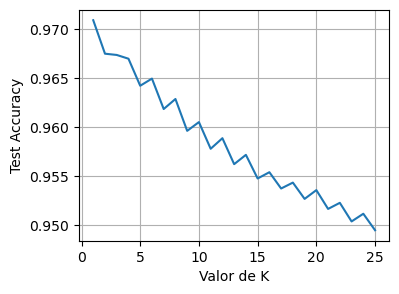

In [28]:
# Graficando la mejor busqueda del hiperparámetro

plt.figure(figsize=(4,3))
plt.plot(k_range, scores)
plt.xlabel('Valor de K'); plt.ylabel('Test Accuracy')
plt.grid(); plt.show()

Por lo tanto, el valor de n_neighbors óptimo es 1. 

In [29]:
# Forma 2.
# Ahora, vamos a evaluar el modelo

from sklearn.model_selection import cross_val_score, KFold
kf = KFold(n_splits=5, shuffle=True, random_state=12)

scores_para_definitivo = []

for i in range(1, 21):
    
    model = KNeighborsClassifier(n_neighbors=i)
    
    cv_scores = cross_val_score(model, X_train, y_train, cv=kf)

    dict_row_score = {'score_medio':np.mean(cv_scores),
                      'score_std':np.std(cv_scores), 'n_neighbors':i}
    
    scores_para_definitivo.append(dict_row_score)

In [32]:
# Creamos el DataFrame a partir de la lista de diccionarios
df_scores = pd.DataFrame(scores_para_definitivo)
# df_scores.head()

In [33]:
# Generamos los límites inferior y superior
df_scores['limite_inferior'] = df_scores['score_medio'] - df_scores['score_std']
df_scores['limite_superior'] = df_scores['score_medio'] + df_scores['score_std']
# df_scores.head()

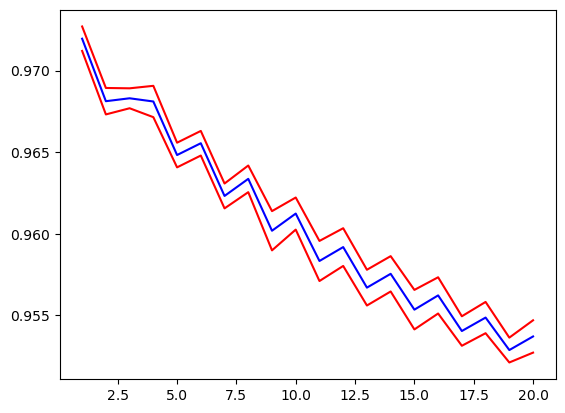

In [34]:
# Graficamos los resultados
plt.plot(df_scores['n_neighbors'], df_scores['limite_inferior'], color='r')
plt.plot(df_scores['n_neighbors'], df_scores['score_medio'], color='b')
plt.plot(df_scores['n_neighbors'], df_scores['limite_superior'], color='r');

In [35]:
# Identificamos el score máximo
df_scores.loc[df_scores.score_medio == df_scores.score_medio.max()]

,score_medio,score_std,n_neighbors,limite_inferior,limite_superior
0,0.97196,0.000749,1,0.97121,0.972709
